# Homework Assignment One

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Section 1: Census Data
Data background: https://www.kaggle.com/muonneutrino/us-census-demographic-data/data

In [2]:
census = pd.read_csv('../data/acs2015_county_data.csv', index_col=[0])
census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.shape

(3220, 36)

### 1. Are there any null values? If so drop rows with nulls from your dataset

In [4]:
census.dropna(inplace = True)
# There were two rows with null values.

(3218, 36)

### 2. What are the most populous counties in Maryland, Iowa, and Oregon

In [5]:
census.groupby('State').max().loc[['Maryland', 'Iowa', 'Oregon'], :]
# Below are the most populous counties.

,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,
Maryland,Worcester,1017859,490093,527766,18.3,96.7,62.6,0.7,16.2,0.1,...,7.0,2.2,8.6,42.8,540333,77.5,32.6,10.1,0.7,13.1
Iowa,Wright,452369,222477,229892,27.0,97.7,9.0,6.5,7.9,0.9,...,16.2,5.8,12.8,27.1,238720,85.5,29.3,16.6,1.5,9.6
Oregon,Yamhill,768418,379725,388693,34.0,95.8,5.3,15.8,9.2,1.0,...,14.3,9.4,12.6,32.6,394637,84.4,30.7,16.2,1.3,16.1


### 3. What percent of counties have more people working in the public sector than in the private?

In [6]:
census.columns


Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [7]:
# Creates a column that compares people working in public vs private sector
census["PublicGreater"] = census.PublicWork - census.PrivateWork
census.columns


Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'PublicGreater'],
      dtype='object')

In [8]:
#Make a function that calculates more people in working in public vs private
def comparison(x):
    if x > 0:
        return 1
    else:
        return 0

In [9]:
count_PublicGreater = census.PublicGreater.apply(comparison).sum()
count_PublicGreater

17

In [10]:
count_PublicGreater / len(census)
# .53% of of counties have more people working in public vs private sector

0.0052827843380981974

### 4. How many counties in New York, California, Texas, Pennsylvania, and Ohio have counties where a majority of residents do not drive to work?

In [11]:
census["NotDrive"] = census.Carpool + census.Transit + census.Walk + census.OtherTransp - census.Drive
census.columns
census.loc[:,'NotDrive'].head(20)

CensusId
1001   -76.8
1003   -73.4
1005   -69.2
1007   -67.1
1009   -72.0
1011   -52.6
1013   -70.7
1015   -73.3
1017   -72.3
1019   -70.3
1021   -64.3
1023   -71.8
1025   -65.1
1027   -70.6
1029   -58.6
1031   -73.3
1033   -82.9
1035   -88.4
1037   -72.9
1039   -68.2
Name: NotDrive, dtype: float64

In [12]:
census["NotDrive"] = census.NotDrive.apply(comparison)
census.loc[:, 'NotDrive'].head(20)
census.groupby("State").sum().loc[["New York", "California", "Texas", "Pennsylvania", "Ohio"], ["NotDrive"]]
# Below is a count of counties in each state where a majority of residents do not drive

,NotDrive
State,
New York,4
California,1
Texas,0
Pennsylvania,0
Ohio,0


### 5. Looking at counties where the proportion of residents who work from home is greater than 10%, do you notice any trends in the locations of those counties?

In [13]:
census.groupby("State").mean().sort_values(by="WorkAtHome", ascending=False).loc[:, "WorkAtHome"]
#census.sort_values(by="WorkAtHome", ascending=False)
# Midwest states have the highest work from home percentages

State
South Dakota            10.424242
Montana                 10.212500
North Dakota             9.420755
Nebraska                 8.823656
Colorado                 7.695312
Vermont                  6.992857
Oregon                   6.738889
California               6.436207
Alaska                   6.358621
Idaho                    6.270455
New Mexico               6.121212
Minnesota                6.091954
Washington               5.953846
Hawaii                   5.900000
New Hampshire            5.890000
Wyoming                  5.860870
Maine                    5.687500
Iowa                     5.447475
Arizona                  5.173333
Utah                     5.127586
Kansas                   5.121905
Massachusetts            5.064286
District of Columbia     5.000000
Wisconsin                4.959722
Missouri                 4.755652
Maryland                 4.545833
Florida                  4.534328
Connecticut              4.387500
Michigan                 4.234940
Delaware

## Section 2: World Happiness Report Data

Data background: https://www.kaggle.com/unsdsn/world-happiness

In [14]:
#Load in data and create new column "Year"
df15 = pd.read_csv("../data/world_happiness_report/2015.csv")
df15["Year"] = 2015
df16 = pd.read_csv("../data/world_happiness_report/2016.csv")
df16["Year"] = 2016
df17 = pd.read_csv("../data/world_happiness_report/2017.csv")
df17["Year"] = 2017

### 1. We need combine the three datasets together into one but before we can do that we need to clean up the column names. 

#### A. Drop the 'Standard Error' column from df15 and 'Lower Confidence Interval' , 'Upper Confidence Interval' columns from df16. Then concatenate df15 and df16 together and assigned the new dataframe to df1516

In [15]:
df15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [16]:
df15.drop("Standard Error", axis = 1, inplace = True)
df15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [17]:
df16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [18]:
df16.shape

(157, 14)

In [19]:
df16.drop("Lower Confidence Interval", axis = 1, inplace = True)
df16.drop("Upper Confidence Interval", axis = 1, inplace = True)
df15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [20]:
df15.shape

(158, 12)

In [21]:
df1516 = pd.concat([df15, df16])
df1516.shape

(315, 12)

In [22]:
df1516.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

#### B. Drop the 'Whisker.high' and 'Whisker.low' columns from df17

In [23]:
df17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [24]:
df17.drop("Whisker.high", axis = 1, inplace = True)
df17.drop("Whisker.low", axis = 1, inplace = True)
df17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Year'],
      dtype='object')

#### C.  Replace the spaces and parentheses in df1516 with an underscore and replace the periods in the df17 columns with an underscore. We do this because in order to concatenate the dataframes they must have identical column names.

Hint: use str.replace()

In [25]:

df1516.columns = df1516.columns.str.replace("(", "_")
df1516.columns = df1516.columns.str.replace(")", "_")
df1516.columns = df1516.columns.str.replace(" ", "_")
df1516.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy__GDP_per_Capita_', 'Family', 'Health__Life_Expectancy_',
       'Freedom', 'Trust__Government_Corruption_', 'Generosity',
       'Dystopia_Residual', 'Year'],
      dtype='object')

In [26]:
df17.columns = df17.columns.str.replace(".", "_")
df17.columns


Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy__GDP_per_Capita_', 'Family', 'Health__Life_Expectancy_',
       'Freedom', 'Generosity', 'Trust__Government_Corruption_',
       'Dystopia_Residual', 'Year'],
      dtype='object')

#### D. Now go ahead and concatenate the two dataframes into one. After that execute .info() on the new dataframe and make sure you see 470 non-null values for every column except "Region"

In [27]:
df151617 = pd.concat([df1516, df17])
df151617.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 12 columns):
Country                          470 non-null object
Dystopia_Residual                470 non-null float64
Economy__GDP_per_Capita_         470 non-null float64
Family                           470 non-null float64
Freedom                          470 non-null float64
Generosity                       470 non-null float64
Happiness_Rank                   470 non-null int64
Happiness_Score                  470 non-null float64
Health__Life_Expectancy_         470 non-null float64
Region                           315 non-null object
Trust__Government_Corruption_    470 non-null float64
Year                             470 non-null int64
dtypes: float64(8), int64(2), object(2)
memory usage: 47.7+ KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


#### Optional: The reason why there are nulls in "Region" is because df17 didn't come with that column. If you're up for a challenge try to find a way to replace the null "Region"  values with their correct values. If not then go ahead and drop "Region"

In [28]:
df151617.head()

,Country,Dystopia_Residual,Economy__GDP_per_Capita_,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health__Life_Expectancy_,Region,Trust__Government_Corruption_,Year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


### 2. Let's look at the relationships between various features and happiness


#### A.
    - Create scatter plots showing the relationship between "Happiness_Score" with "Family", "Freedom", 
    "Generosity", "Economy__GDP_per_Capita", "Health__Life_Expectancy_", and "Trust__Government_Corruption_" scores. 
    - You'll be making six different scatter plots so use a 2x3 subplot to portray this. 
    - Make sure the label the x and y axes for each plot.

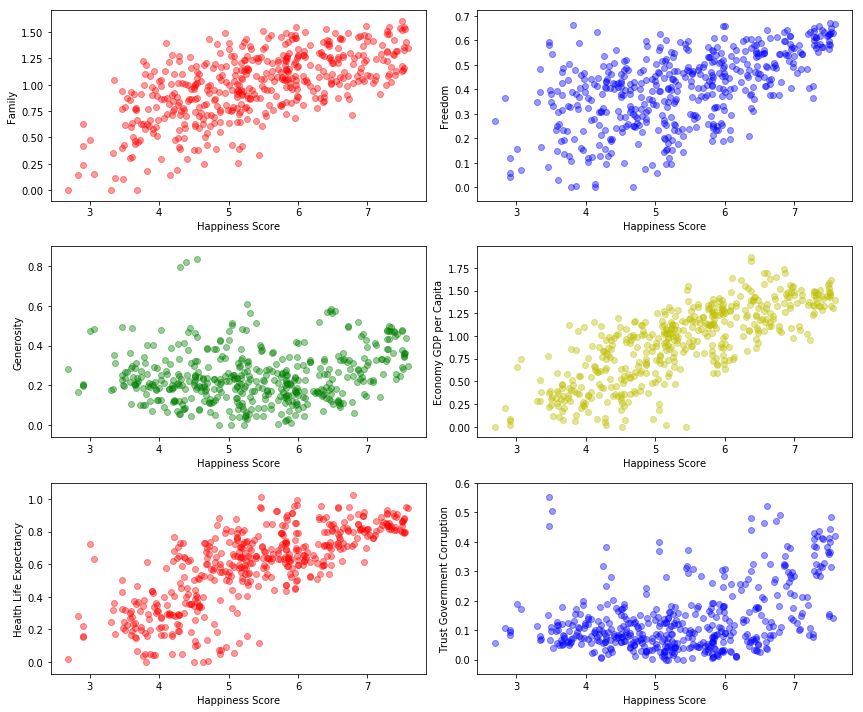

In [29]:
plt.figure(figsize=(12,10))

plt.subplot(3, 2, 1)
plt.scatter(x = df151617.Happiness_Score, y = df151617.Family, color='r', alpha=.4)
plt.xlabel("Happiness Score")
plt.ylabel("Family")

plt.subplot(3, 2, 2)
plt.scatter(x = df151617.Happiness_Score, y = df151617.Freedom, color='b', alpha=.4)
plt.xlabel("Happiness Score")
plt.ylabel("Freedom")

plt.subplot(3, 2, 3)
plt.scatter(x = df151617.Happiness_Score, y = df151617.Generosity, color='g', alpha=.4)
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")

plt.subplot(3, 2, 4)
plt.scatter(x = df151617.Happiness_Score, y = df151617.Economy__GDP_per_Capita_, color='y', alpha=.4)
plt.xlabel("Happiness Score")
plt.ylabel("Economy GDP per Capita")

plt.subplot(3, 2, 5)
plt.scatter(x = df151617.Happiness_Score, y = df151617.Health__Life_Expectancy_, color='r', alpha=.4)
plt.xlabel("Happiness Score")
plt.ylabel("Health Life Expectancy")

plt.subplot(3, 2, 6)
plt.scatter(x = df151617.Happiness_Score, y = df151617.Trust__Government_Corruption_, color='b', alpha=.4)
plt.xlabel("Happiness Score")
plt.ylabel("Trust Government Corruption")

#tight_layout() adds spacing between plots
plt.tight_layout()
plt.show()

In [30]:
#### B. Which feature do you think has the strongest relationship with "Happiness_Score"? How many features have a positive, negative, or  no relationship with happiness?


In [31]:
df151617.corr().loc["Happiness_Score"].sort_values()
# Happiness_Rank, Econonomy__GDP_per_Capita_, Health__Life_Expectancy, and Family have the strongest relationship with Happiness_Score
# Seven features have postive relationships with Happiness_Score
# Two features have negative relationship with Happiness_Score
# Generosity have a very low relationship with Happiness_Score

Happiness_Rank                  -0.993268
Year                            -0.007761
Generosity                       0.163562
Trust__Government_Corruption_    0.406340
Dystopia_Residual                0.489747
Freedom                          0.560353
Family                           0.636532
Health__Life_Expectancy_         0.748040
Economy__GDP_per_Capita_         0.785450
Happiness_Score                  1.000000
Name: Happiness_Score, dtype: float64

### 3. Show the 10 countries with the biggest increases and decreases in their happiness scores between 2015 and 2017. The appropriate selection of chart type is up to your discretion.

In [32]:
happiness_pivot = df151617.pivot("Country", "Year", "Happiness_Score")
happiness_pivot

Year,2015,2016,2017
Country,,,
Afghanistan,3.575,3.360,3.794
Albania,4.959,4.655,4.644
Algeria,5.605,6.355,5.872
Angola,4.033,3.866,3.795
Argentina,6.574,6.650,6.599
Armenia,4.350,4.360,4.376
Australia,7.284,7.313,7.284
Austria,7.200,7.119,7.006
Azerbaijan,5.212,5.291,5.234


In [33]:
happiness_pivot.columns = happiness_pivot.columns.astype(str)

In [34]:
happiness_pivot["Compare1517"] = happiness_pivot['2017'] - happiness_pivot['2015']

In [35]:
top_ten = happiness_pivot.sort_values(by="Compare1517", ascending=False).head(10)
top_ten

Year,2015,2016,2017,Compare1517
Country,,,,
Latvia,5.098,5.560,5.850,0.752
Romania,5.124,5.528,5.825,0.701
Togo,2.839,3.303,3.495,0.656
Senegal,3.904,4.219,4.535,0.631
Gabon,3.896,4.121,4.465,0.569
Egypt,4.194,4.362,4.735,0.541
Ivory Coast,3.655,3.916,4.180,0.525
Hungary,4.800,5.145,5.324,0.524
Bulgaria,4.218,4.217,4.714,0.496


In [36]:
top_ten.columns = top_ten.columns.astype(str)

<BarContainer object of 10 artists>

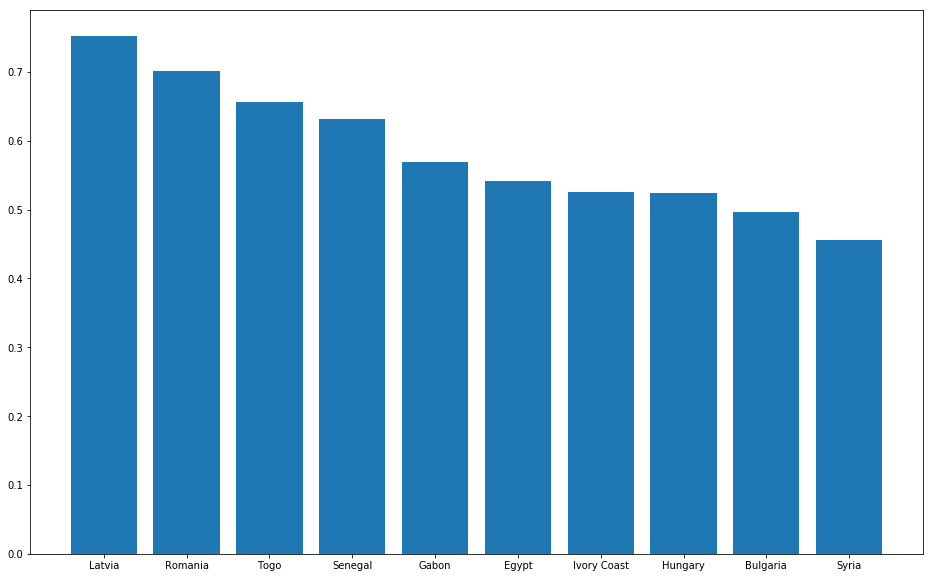

In [37]:
plt.figure(figsize=(16, 10))
plt.bar(top_ten.index, top_ten.Compare1517, linewidth = 3)
# 
# Why is 2017 not recognized?
# top_ten.Compare1517.plot(kind='hist', bins = 10, figsize=(9, 6));

In [38]:
bottom_ten = happiness_pivot.sort_values(by="Compare1517", ascending=True).head(10)
bottom_ten

Year,2015,2016,2017,Compare1517
Country,,,,
Venezuela,6.810,6.084,5.250,-1.560
Lesotho,4.898,NaN,3.808,-1.090
Liberia,4.571,3.622,3.533,-1.038
Central African Republic,3.678,NaN,2.693,-0.985
Haiti,4.518,4.028,3.603,-0.915
Zimbabwe,4.610,4.193,3.875,-0.735
Zambia,5.129,4.795,4.514,-0.615
Mexico,7.187,6.778,6.578,-0.609
Ukraine,4.681,4.324,4.096,-0.585


<BarContainer object of 10 artists>

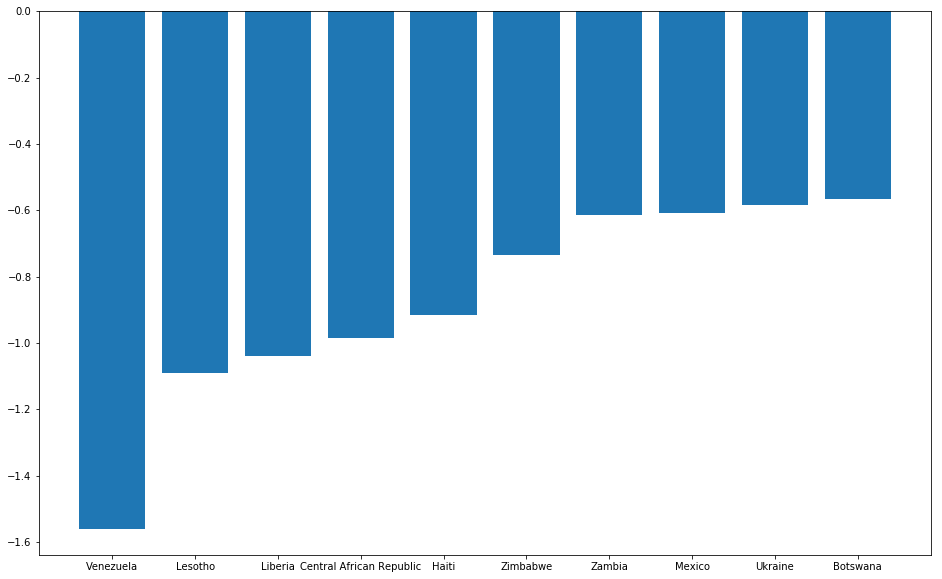

In [151]:
plt.figure(figsize=(16, 10))
plt.bar(bottom_ten.index, bottom_ten.Compare1517, linewidth = 3)

## Section 3: BikeShare Data
Data background: https://www.fordgobike.com/system-data. Each row represents a bikeshare trip.

In [39]:
bike_share = pd.read_csv("../data/bike_share_data/201903-fordgobike-tripdata.csv")
bike_share.dropna(inplace=True)
bike_share.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,1990.0,Male,No
3,59315,2019-03-31 16:48:54.3740,2019-04-01 09:17:30.1540,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,1996.0,Female,No
4,47886,2019-03-31 19:54:24.1480,2019-04-01 09:12:30.8170,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,1974.0,Female,No
5,67439,2019-03-31 14:07:39.7160,2019-04-01 08:51:39.0340,195.0,Bay Pl at Vernon St,37.812314,-122.260779,212.0,Mosswood Park,37.824893,-122.260437,5118,Customer,1991.0,Male,No


In [49]:
bike_share.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_stop'],
      dtype='object')

In [48]:
import pandas as pd
import numpy as np

In [42]:
### 1. Create histograms of the birth years for the type user types of "Customer" and "Subscriber" on the same plot. Does this visualization inform you that one type of bike share user is noticeably older or younger than the other?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27117048>,
      dtype=object)

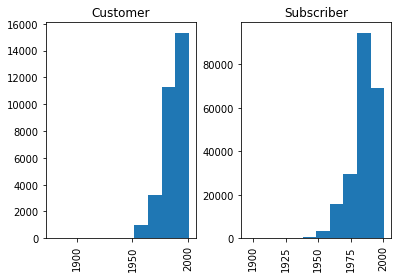

In [69]:
bike_share.hist(by = "user_type", column="member_birth_year")

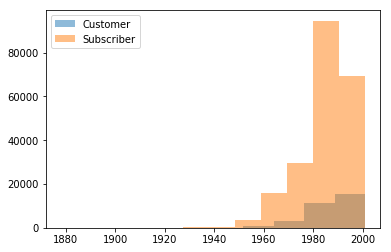

In [75]:
plt.hist(bike_share[bike_share.user_type == "Customer"].member_birth_year, alpha = .5, label = "Customer")
plt.hist(bike_share[bike_share.user_type == "Subscriber"].member_birth_year, alpha = .5, label = "Subscriber")
plt.legend()

In [89]:
bike_share.pivot_table(index = "member_birth_year", columns="user_type", aggfunc=len).bike_id

user_type,Customer,Subscriber
member_birth_year,,
1878.0,2.0,NaN
1896.0,2.0,9.0
1900.0,18.0,41.0
1901.0,NaN,28.0
1902.0,NaN,14.0
1904.0,4.0,NaN
1920.0,1.0,9.0
1931.0,NaN,142.0
1933.0,NaN,36.0


In [84]:
bike_share.groupby("user_type").member_birth_year.value_counts().unstack().T

user_type,Customer,Subscriber
member_birth_year,,
1878.0,2.0,NaN
1896.0,2.0,9.0
1900.0,18.0,41.0
1901.0,NaN,28.0
1902.0,NaN,14.0
1904.0,4.0,NaN
1920.0,1.0,9.0
1931.0,NaN,142.0
1933.0,NaN,36.0


In [65]:
#bike_share.loc['Customer', ['member_birth_year']]

#gender_pivot = bike_share.pivot(index, columns='member_gender', values='duration_sec')

KeyError: 'Customer'

In [43]:
#plt.figure(figsize=(16, 10))
#plt.bar(bike_share.user_type, bike_share.member_birth_year, linewidth = 3);                        
                                  

### 2. What are the top 10 most popular start and end station combinations? Show your answer with a visualization.

In [94]:
bike_share[["start_station_id", "end_station_id"]].astype(str).dtypes

start_station_id    object
end_station_id      object
dtype: object

In [95]:
#["start_stop"] = pd.concat([bike_share.start_station_id, bike_share.end_station_id])

bike_share.loc[:, ["start_station_id", "end_station_id"]] = bike_share[["start_station_id", "end_station_id"]].astype(str)
# bike_share["start_stop"] = bike_share[["start_station_id"] + bike_share["end_station_id"]



In [96]:
bike_share["start_stop"] = bike_share["start_station_id"] + bike_share["end_station_id"]

In [45]:
#count_start_stop = bike_share.start_stop.count()
#count_start_stop
#bike_share.start_stop.count().plot(kind = "bar", figsize=(15, 7));
bike_share("start_stop").plot(kind = "bar", figsize=(18, 10))

TypeError: 'DataFrame' object is not callable

### 3. Create box plots of trip durations for the three gender categories. Based on this visualization, can you state that there is a significant differences in the duration of bikeshare trips for each group?

**Important:** Make sure to set the parameter "showfliers" to False. This gets rid of the outliers and thus makes the chart much more readable.

In [66]:
bike_share.member_gender.unique()

array(['Other', 'Male', 'Female'], dtype=object)

In [67]:
other_duration = bike_share[bike_share.member_gender == "Other"].loc[:,['duration_sec']]
male_duration = bike_share[bike_share.member_gender == "Male"].loc[:,['duration_sec']]
female_duration = bike_share[bike_share.member_gender == "Female"].loc[:,['duration_sec']]

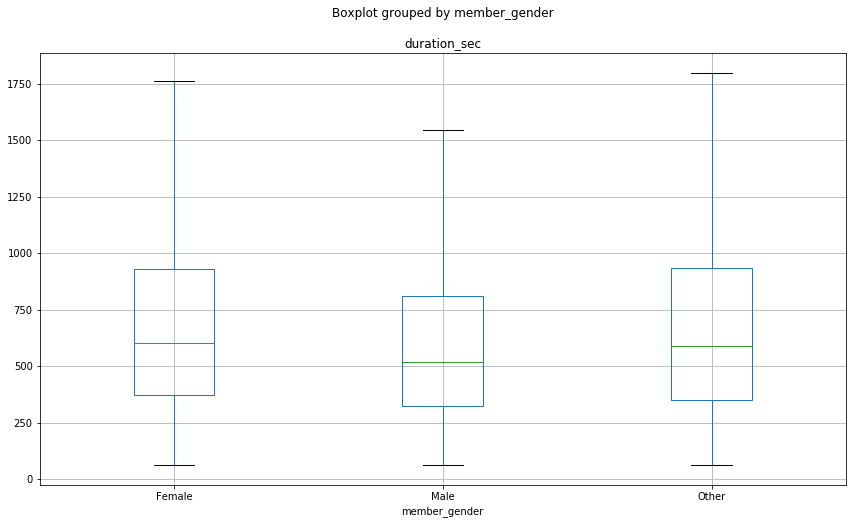

In [68]:

bike_share.boxplot(column='duration_sec', by='member_gender', showfliers = False, figsize=(14, 8));

In [ ]:
#gender_pivot = bike_share.pivot(index, columns='member_gender', values='duration_sec')
# Why doesn't this work??

In [ ]:


## Section 4: Fifa Video Game Data
## Data background: https://www.kaggle.com/karangadiya/fifa19

In [99]:
fifa = pd.read_csv("../data/fifa19.csv", index_col = [0])
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [100]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [101]:
fifa.shape

(18207, 88)

### 1. Clean up the data.
    - Lowercase the column names and replace the spaces with underscores.
    - Set the "name" column as the index.
    - Drop the columns in the bad_cols list.
    - Get rid of all players who are goalkeepers.
    - Drop every player whose rating is less than 60.
    - Convert the "height" and "weight" columns to float types.
    - Check to see if there rows with nulls, if so drop them from the dataset

In [102]:
bad_cols = ["photo","flag","club_logo", "special", "international_reputation", "weak_foot", "jersey_number", 
           "joined", "loaned_from", "contract_valid_until", 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gkdiving', 'gkhandling',
       'gkkicking', 'gkpositioning', 'gkreflexes', 'release_clause']

In [103]:
fifa.columns = map(str.lower, fifa.columns)
fifa.columns = fifa.columns.str.replace(" ", "_")
fifa.columns

Index(['id', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club_logo', 'value', 'wage', 'special',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face', 'position',
       'jersey_number', 'joined', 'loaned_from', 'contract_valid_until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle', 'gkdiv

In [104]:
fifa.drop(bad_cols, axis=1, inplace=True)
# How to drop based on a list of values?
fifa.columns

Index(['id', 'name', 'age', 'nationality', 'overall', 'potential', 'club',
       'value', 'wage', 'preferred_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'position', 'height', 'weight', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle'],
      dtype='object')

In [105]:
fifa.set_index("name", inplace=True)

In [106]:
fifa.position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [107]:
#drinks[(drinks.continent == "EU") & (drinks.wine_servings > 20)]
fifa = fifa[(fifa.position != "GK") & (fifa.overall >59)]
min(fifa.overall)

60

In [108]:
fifa.height.head()
# How to properly convert to float?

name
L. Messi              5'7
Cristiano Ronaldo     6'2
Neymar Jr             5'9
K. De Bruyne         5'11
E. Hazard             5'8
Name: height, dtype: object

In [130]:
fifa["height"] = fifa.height.str.replace("'", ".")  
fifa["height"] = fifa.height.astype(float)
# fifa.height.head()

In [111]:
fifa["weight"] = fifa.weight.str.replace("lbs", "")

In [112]:
fifa.weight.head()

name
L. Messi             159
Cristiano Ronaldo    183
Neymar Jr            150
K. De Bruyne         154
E. Hazard            163
Name: weight, dtype: object

In [113]:
fifa["weight"] = fifa.weight.astype(float)

In [114]:
fifa.shape

(13810, 45)

In [115]:
#fifa.dropna()
fifa.isna().sum()

id                   0
age                  0
nationality          0
overall              0
potential            0
club               183
value                0
wage                 0
preferred_foot      48
skill_moves         48
work_rate           48
body_type           48
real_face           48
position            53
height              48
weight              48
crossing            48
finishing           48
headingaccuracy     48
shortpassing        48
volleys             48
dribbling           48
curve               48
fkaccuracy          48
longpassing         48
ballcontrol         48
acceleration        48
sprintspeed         48
agility             48
reactions           48
balance             48
shotpower           48
jumping             48
stamina             48
strength            48
longshots           48
aggression          48
interceptions       48
positioning         48
vision              48
penalties           48
composure           48
marking             48
standingtac

In [116]:
fifa.dropna(inplace=True)
fifa.shape

(13579, 45)

In [117]:
#fifa_subset = fifa.head(20)
#fifa_subset.plot(kind = "bar", x= "club", y = "overall")
#Example of bar plot

### 2. Who are the top five players of the following attributes: speed, marking, and finishing

In [118]:
fifa.columns

Index(['id', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'preferred_foot', 'skill_moves', 'work_rate', 'body_type',
       'real_face', 'position', 'height', 'weight', 'crossing', 'finishing',
       'headingaccuracy', 'shortpassing', 'volleys', 'dribbling', 'curve',
       'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle'],
      dtype='object')

In [119]:
fifa.sort_values(by="sprintspeed", ascending=False).head().loc[:, "sprintspeed"]

name
K. Mbappé    96.0
L. Sané      96.0
Adama        96.0
G. Bale      95.0
J. Damm      95.0
Name: sprintspeed, dtype: float64

In [120]:
fifa.sort_values(by="marking", ascending=False).head().loc[:, "marking"]

name
A. Barzagli     94.0
G. Chiellini    93.0
M. Škriniar     92.0
Piqué           91.0
K. Koulibaly    91.0
Name: marking, dtype: float64

In [121]:
fifa.sort_values(by="finishing", ascending=False).head().loc[:, "finishing"]

name
L. Messi             95.0
H. Kane              94.0
Cristiano Ronaldo    94.0
L. Suárez            93.0
S. Agüero            93.0
Name: finishing, dtype: float64

### 3. Who is the tallest French lefted foot player?

In [122]:
fifa.preferred_foot.unique()

array(['Left', 'Right'], dtype=object)

In [131]:
fifa_modified = fifa[fifa.preferred_foot == "Left"]
fifa_modified.preferred_foot.unique()

array(['Left'], dtype=object)

In [132]:
fifa_modified.nationality.unique()

array(['Argentina', 'Spain', 'France', 'Italy', 'Egypt', 'Colombia',
       'Brazil', 'Wales', 'Belgium', 'Germany', 'Portugal', 'Algeria',
       'Austria', 'Serbia', 'Netherlands', 'Morocco', 'Scotland',
       'Central African Rep.', 'Denmark', 'Ukraine', 'Mexico', 'Jamaica',
       'Poland', 'Slovenia', 'Switzerland', 'England', 'Paraguay',
       'Romania', 'Bosnia Herzegovina', 'United States', 'Cape Verde',
       'Uruguay', 'Iceland', 'Ghana', 'Guinea', 'Turkey', 'Zimbabwe',
       'Burkina Faso', 'Chile', 'Japan', 'Greece', 'Estonia', 'Russia',
       'Ecuador', 'Republic of Ireland', 'Sweden', 'United Arab Emirates',
       'Czech Republic', 'Croatia', 'Australia', 'Ivory Coast', 'Norway',
       'South Africa', 'Madagascar', 'DR Congo', 'Montenegro',
       'Costa Rica', 'Senegal', 'Gambia', 'Hungary', 'FYR Macedonia',
       'Mali', 'Nigeria', 'Korea Republic', 'Cyprus', 'Saudi Arabia',
       'Curacao', 'Cameroon', 'Canada', 'Moldova', 'Trinidad & Tobago',
       'Peru', '

In [134]:
fifa_modified.groupby("nationality").idxmax().loc["France", "height"]

# How to get the name? idx?

'D. Zagadou'

### 4. Create a bar chart showing the correlation scores with the "overall" column. Make sure it is in order from least to greatest.

In [ ]:
overall_corr = fifa.corr().loc["overall"].sort_values()
overall_corr.head()

In [ ]:
overall_corr.plot(kind = "bar", figsize=(16, 6))

### 5. Create a dataframe with only players from the clubs in the clubs_list. Call the dataframe fifa2. From now on we'll be using fifa2

In [143]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma', 'Tottenham Hotspur']
clubs_list

['Real Madrid',
 'FC Barcelona',
 'FC Bayern',
 'Manchester Utd',
 'Chelsea',
 'Arsenal',
 'Juventus',
 'PSG',
 'Manchester City',
 'Bor. Dortmund',
 'Liverpool',
 'Roma',
 'Tottenham Hotspur']

In [144]:
fifa.club.isin(clubs_list).head()

name
L. Messi              True
Cristiano Ronaldo     True
Neymar Jr            False
K. De Bruyne          True
E. Hazard             True
Name: club, dtype: bool

In [145]:
fifa2 = fifa[fifa.club.isin(clubs_list)]
fifa2.club.unique()

array(['FC Barcelona', 'Juventus', 'Manchester City', 'Chelsea',
       'Real Madrid', 'Tottenham Hotspur', 'Liverpool', 'Arsenal', 'Roma'],
      dtype=object)

### 6.  Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in fifa2

In [146]:
fifa2.columns

Index(['id', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'preferred_foot', 'skill_moves', 'work_rate', 'body_type',
       'real_face', 'position', 'height', 'weight', 'crossing', 'finishing',
       'headingaccuracy', 'shortpassing', 'volleys', 'dribbling', 'curve',
       'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle'],
      dtype='object')

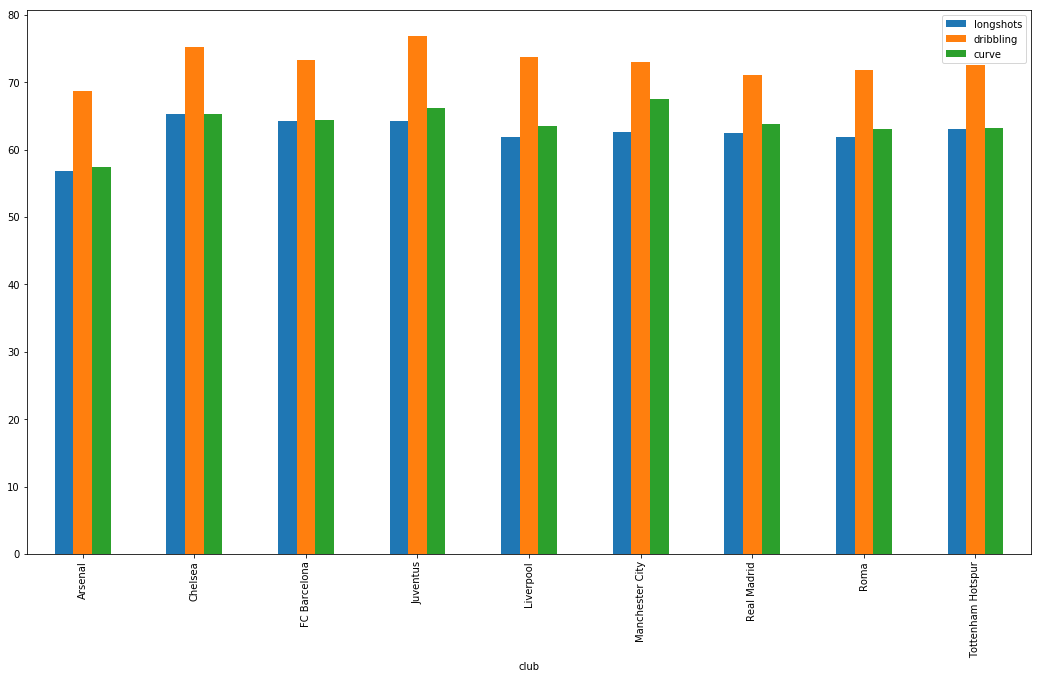

In [147]:
fifa2.groupby("club").mean().loc[:, ["longshots", "dribbling", "curve"]].plot(kind = "bar", figsize=(18, 10))


### 7. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots. Do you notice any sort of relationship among the three variables?

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = preferred_foot.

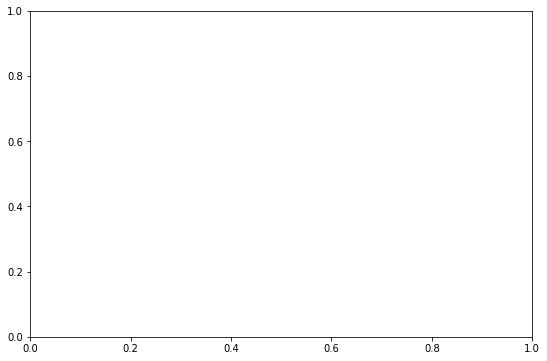

In [141]:
fifa2.plot(kind='scatter', x='shortpassing', y='marking', c='preferred_foot', colormap='Blues', figsize=(9, 6));

In [148]:
fifa2['preferred_foot'].replace({'Left':0, 'Right':1},inplace=True)
fifa2.preferred_foot.unique()

array([0, 1])

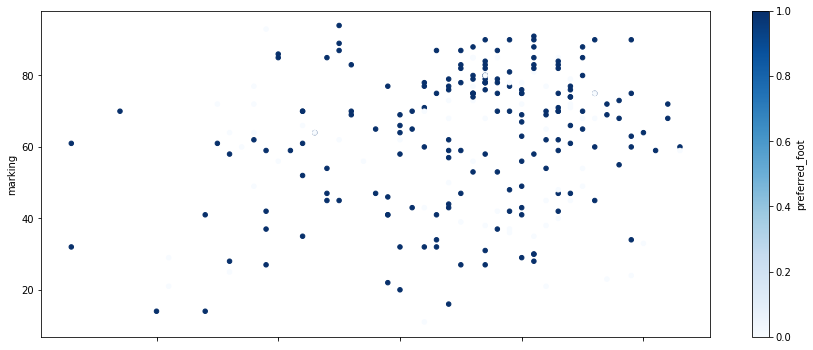

In [150]:
fifa2.plot(kind='scatter', x='shortpassing', y='marking', c='preferred_foot', colormap='Blues', figsize=(15, 6));